# Advanced Certification in Computational Data Science
## A Program by IISc and TalentSprint
### Mini-Project (Ungraded)



## Learning Objective

At the end of this experiment, you will be able to:

* perform Data preprocessing
* implement ML classification algorithms

## Problem Statement

We will be using district wise demographics, enrollments, and teacher indicator data to predict whether the literacy rate is high/ medium/ low in each district.

### Data Preprocessing

Data preprocessing is an important step in solving every machine learning problem. Most of
the datasets used with Machine Learning problems need to be processed / cleaned / transformed
so that a Machine Learning algorithm can be trained on it.

There are different steps involved in Data Preprocessing. These steps are as follows:

    1. Data Cleaning → In this step the primary focus is on
        - Handling missing data
        - Handling noisy data
        - Detection and removal of outliers
    
    2. Data Integration → This process is used when data is gathered from various data sources
    and data are combined to form consistent data. This data after performing cleaning is used
    for analysis.
    
    3. Data Transformation → In this step we will convert the raw data into a specified format according to the need of the model we are building. There are many options used for
    transforming the data as below:
        - Normalization
        - Aggregation
        - Generalization
        
    4. Data Reduction → Following data transformation and scaling, the redundancy within the data is removed and is organized efficiently.



In [1]:
# @title Download the datasets
from IPython import get_ipython

ipython = get_ipython()
  
notebook="U1_MH1_Data_Munging" #name of the notebook

def setup():
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/aiml/Experiment_related_data/B15_Data_Munging.zip")
    ipython.magic("sx unzip B15_Data_Munging.zip")
    print("Data downloaded successfully")
    return

setup()

Data downloaded successfully


In [2]:
!ls

B15_Data_Munging.zip	B15_Data_Munging.zip.5
B15_Data_Munging.zip.1	Districtwise_Basicdata.csv
B15_Data_Munging.zip.2	Districtwise_Enrollment_details_indicator.csv
B15_Data_Munging.zip.3	Districtwise_Teacher_indicator.csv
B15_Data_Munging.zip.4	sample_data


## Exercise 1 - Load and Explore the Data 
1. We have three different files

  * Districtwise_Basicdata.csv
  * Districtwise_Enrollment_details_indicator.csv
  * Districtwise_Teacher_indicator.csv

  These files contain the necessary data to solve the problem. <br>

2. Load the files based on **team allocation** mentioned below. Observe the header level details, data records while loading the data.
  
  Hint : Use read_csv from pandas with [skiprows or header](https://towardsdatascience.com/import-csv-files-as-pandas-dataframe-with-skiprows-skipfooter-usecols-index-col-and-header-fbf67a2f92a) options.

3. Read the columns of the dataset and rename if required.

  Hint : Rename column names (if any) using the following [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html).

Team allocation for dataset selection

    Team A = 1,3,5,7,9
        Districtwise_Basicdata.csv
        Districtwise_Enrollment_details_indicator.csv

    Team B = 2,4,6,8,10
        Districtwise_Basicdata.csv
        Districtwise_Teacher_indicator.csv

In [38]:
# Importing all the required packages and add neccesary imports if required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
# Label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Exporting the model into a dot file
import os
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [4]:
# YOUR CODE HERE for loading and exploring the datasets
basic_data=pd.read_csv("/content/Districtwise_Basicdata.csv",skiprows=1)
Enrollment_data=pd.read_csv("/content/Districtwise_Enrollment_details_indicator.csv",skiprows=3)
Enrollment_data.shape,basic_data.shape

((1324, 166), (1324, 19))

In [5]:
basic_data.rename(columns={'statename':'State Name '})
basic_data.columns

Index(['Year', 'Statecd', 'statename', 'distcd', 'distname', 'blocks',
       'clusters', 'villages', 'totschools', 'totpopulation', 'p_06_pop',
       'p_urb_pop', 'sexratio', 'sexratio_06', 'growthrate', 'p_sc_pop',
       'p_st_pop', 'overall_lit', 'female_lit'],
      dtype='object')

## Exercise 2  - Data Integration

As the required data is present in different datasets, we need to **integrate both to make a single dataframe/dataset**.
  * For integrating the datasets, create a unique identifier for each row in both the dataframes so that it can be used to map the data in different files.
   
    * Combine year, state code, district code columns and form a new unique identifier column, refer this [link](https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas).
    * Set the identifier column as the index for each dataframe.

    * Integrate the dataframes using the above index
     
     Hint: For merging or joining the datasets, refer to this [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

**Example:** Data of the district Anantapur in Andrapradesh, which is present in different files should form a single row after integrating the datasets


In [6]:
# YOUR CODE HERE for integrating the datasets
#To add a new column
basic_data['unique_id'] = basic_data.iloc[:, [0, 1, 3]].apply(lambda x: ",".join(x.dropna().astype(str)), axis=1)
Enrollment_data['unique_id'] = Enrollment_data.iloc[:, [0, 1, 3]].apply(lambda x: ",".join(x.dropna().astype(str)), axis=1)
#Set primary key as index
basic_data.set_index('unique_id', inplace=True)
Enrollment_data.set_index('unique_id', inplace=True)
#Integrating dataset
df_i = pd.merge(basic_data, Enrollment_data, on=['unique_id'], suffixes=('_b', '_e'))

In [7]:
df_i.shape

(1324, 185)

In [8]:
# YOUR CODE HERE for data cleaning
df_i.info(null_counts=True,verbose=True) 

<class 'pandas.core.frame.DataFrame'>
Index: 1324 entries, 2012-13,35,3501 to 2013-14,19,1904
Data columns (total 185 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year_b         1324 non-null   object 
 1   Statecd_b      1324 non-null   int64  
 2   statename      1324 non-null   object 
 3   distcd_b       1324 non-null   int64  
 4   distname_b     1324 non-null   object 
 5   blocks         1324 non-null   int64  
 6   clusters       1324 non-null   int64  
 7   villages       1324 non-null   int64  
 8   totschools     1324 non-null   int64  
 9   totpopulation  1268 non-null   float64
 10  p_06_pop       1266 non-null   float64
 11  p_urb_pop      1262 non-null   float64
 12  sexratio       1268 non-null   float64
 13  sexratio_06    1266 non-null   float64
 14  growthrate     1268 non-null   float64
 15  p_sc_pop       1256 non-null   float64
 16  p_st_pop       1256 non-null   float64
 17  overall_lit    1268 non-null   

## Exercise 3 - Data Cleaning 

1.  **overall_lit** is our target variable. Delete rows with missing overall_lit value

   Hint: Refer to the link [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).


2.  Convert categorical values to numerical values.

  For example, if a feature contains categorical values such as dog, cat, mouse, etc then replace them with 1, 2, 3, etc or use [Sklearn LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) 

3. Replace the missing values in any other column appropriately with mean / median / mode.

  Hint: Use pandas [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function to replace the missing values




**verbose**:  bool, optional
Whether to print the full summary. By default, the setting in pandas.options.display.max_info_columns is followed

In [9]:
df_i.dropna(subset=['overall_lit'], inplace=True)
df_i.shape

(1268, 185)

In [10]:
#categorical variable conversion
le = LabelEncoder()
df_i["overall_lit"] = le.fit_transform(df_i["overall_lit"])

Missing Values

In [11]:
miss_col=list(df_i.columns[df_i.isnull().any()])
len(miss_col)

37

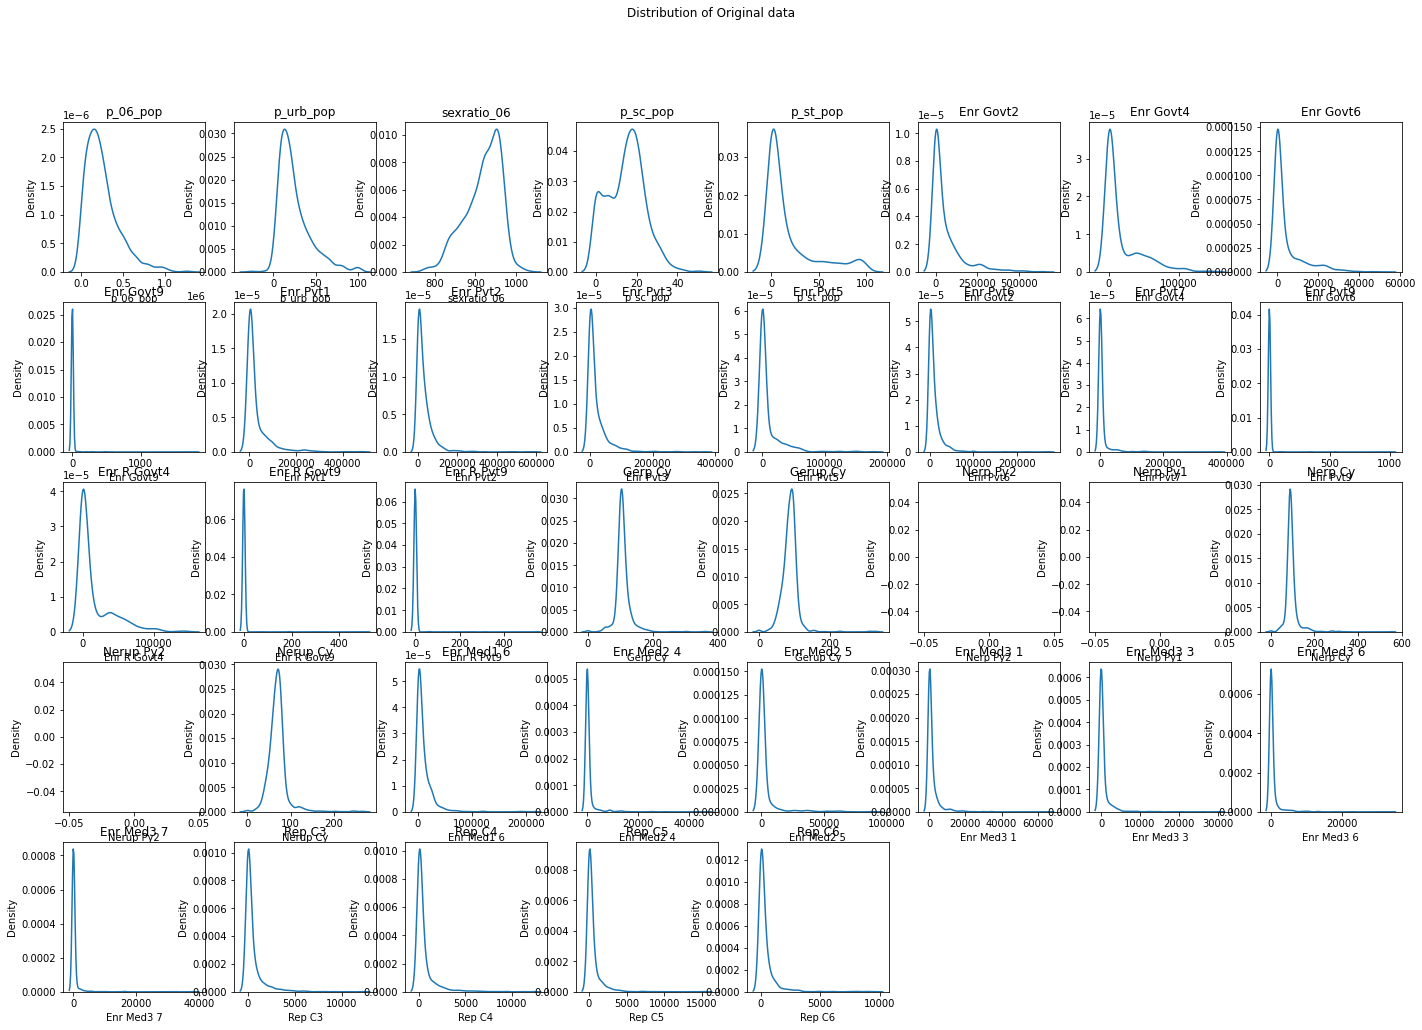

In [12]:
#data distribution
plt.figure(figsize=(24,16))
plt.suptitle('Distribution of Original data')
for i in enumerate(miss_col):
    plt.subplot(5,8,i[0]+1)
    sns.distplot(df_i[i[1]],hist=False)
    plt.title(i[1])
    

In [13]:
for col in miss_col:
  df_i[col].fillna(df_i[col].median(), inplace=True)


In [43]:
"""
    df_i['p_06_pop'].fillna(df_i['p_06_pop'].median(), inplace=True)
    df_i['p_urb_pop'].fillna(df_i['p_urb_pop'].median(), inplace=True)
    df_i['p_sc_pop'].fillna(df_i['p_sc_pop'].median(), inplace=True)
    df_i['sexratio_06'].fillna(df_i['sexratio_06'].median(), inplace=True)
    df_i['p_st_pop'].fillna(df_i['p_st_pop'].median(), inplace=True)
    df_i['Enr Govt2'].fillna(df_i['Enr Govt2'].median(), inplace=True)
    df_i['Enr Govt4'].fillna(df_i['Enr Govt4'].median(), inplace=True)
    df_i['Enr Govt6'].fillna(df_i['Enr Govt6'].median(), inplace=True)
    df_i['Enr Govt9'].fillna(df_i['Enr Govt9'].median(), inplace=True)
    df_i['Enr Pvt1'].fillna(df_i['Enr Pvt1'].median(), inplace=True)
    df_i['Enr Pvt2'].fillna(df_i['Enr Pvt2'].median(), inplace=True)
    df_i['Enr Pvt3'].fillna(df_i['Enr Pvt3'].median(), inplace=True)
    df_i['Enr Pvt5'].fillna(df_i['Enr Pvt6'].median(), inplace=True)
    df_i['Enr Pvt6'].fillna(df_i['Enr Pvt7'].median(), inplace=True)
    df_i['Enr Pvt9'].fillna(df_i['Enr Pvt9'].median(), inplace=True)
    df_i['Enr R Govt4'].fillna(df_i['Enr R Govt4'].median(), inplace=True)
    df_i['Enr R Govt9'].fillna(df_i['Enr R Govt9'].median(), inplace=True)
    df_i['Enr R Pvt9'].fillna(df_i['Enr R Pvt9'].median(), inplace=True)
    df_i['Enr Pvt7'].fillna(df_i['Enr Pvt7'].median(), inplace=True)
    df_i['Gerp Cy'].fillna(df_i['Gerp Cy'].median(), inplace=True)
    df_i['Gerup Cy'].fillna(df_i['Gerup Cy'].median(), inplace=True)
    df_i['Nerp Py2'].fillna(df_i['Nerp Py2'].median(), inplace=True)
    df_i['Nerp Py1'].fillna(df_i['Nerp Py1'].median(), inplace=True)
    df_i['Nerp Cy'].fillna(df_i['Nerp Cy'].median(), inplace=True)
    df_i['Nerup Py2'].fillna(df_i['Nerup Py2'].median(), inplace=True)
    df_i['Nerup Cy'].fillna(df_i['Nerup Cy'].median(), inplace=True)
    df_i['Enr Med1 6'].fillna(df_i['Enr Med1 6'].median(), inplace=True)
    df_i['Enr Med2 4'].fillna(df_i['Enr Med2 4'].median(), inplace=True)
    df_i['Enr Med2 5'].fillna(df_i['Enr Med2 5'].median(), inplace=True)
    df_i['Enr Med3 3'].fillna(df_i['Enr Med3 3'].median(), inplace=True)
    df_i['Enr Med3 6'].fillna(df_i['Enr Med3 6'].median(), inplace=True)
    df_i['Enr Med3 7'].fillna(df_i['Enr Med3 7'].median(), inplace=True)
    df_i['Enr Med3 1'].fillna(df_i['Enr Med3 1'].median(), inplace=True)
    df_i['Rep C3'].fillna(df_i['Rep C3'].median(), inplace=True)
    df_i['Rep C4'].fillna(df_i['Rep C4'].median(), inplace=True)
    df_i['Rep C5'].fillna(df_i['Rep C5'].median(), inplace=True)
    df_i['Rep C6'].fillna(df_i['Rep C6'].median(), inplace=True)
    """

## Exercise 4 

1. Remove the unneccesary columns which are not contributing to the overall literacy rate

2. Verify if there are any duplicate columns and remove them.

  For example: state name and district name are same as state code and district code.

3. Make sure that the final dataframe has no null or nan values. Delete the rows with missing values.

   Hint: Verify with df.isna() for nan values in the dataframe. 

In [14]:
# YOUR CODE HERE for cleaning the dataframe
# Drop columns which does not have significance
df_i.drop(['Year_b', 'distname_b', 'Year_e', 'Statecd_e', 'State Name ',
               'distcd_e', 'distname_e', 'Gerp Py2', 'Gerp Py1', 'Gerup Py2', 'Gerup Py1', 'Nerp Py1',
               'Nerp Py2', 'Nerup Py1', 'Nerup Py2', 'Statecd_b', 'distcd_b', 'distname_e', 'statename'],
              axis=1, inplace=True)

In [15]:
df_i.columns[df_i.isnull().any()]

Index([], dtype='object')

## Exercise 5 - Apply Correlation Matrix

Correlation is a statistical technique that can show whether, and how strongly, pairs of variables are related. More number of features does not imply better accuracy. More features may lead to a decline in the accuracy and create noise in the model, if they contain any irrelevant features.

*Features with high correlation value will imply the same meaning. Hence remove the highly correlated features*

**Function Description:**

Create a function `remove_Highly_Correlated()` function, which removes highly correlated features in the dataframe.
- Creates a correlation matrix of row and column wise features
- Extracts only upper triangular matrix as correlation matrix, which will have the same values below and above the diagonal
- Removes columns which are having correlation value more than the threshold value.

In [16]:
def remove_Highly_Correlated(df, bar=0.9):
  # Creates correlation matrix
  corr = df.corr()

  # Set Up Mask To Hide Upper Triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))
  tri_df = corr.mask(mask)

  # Finding features with correlation value more than specified threshold value (bar=0.9)
  highly_cor_col = [col for col in tri_df.columns if any(tri_df[col] > bar )]
  print("length of highly correlated columns",len(highly_cor_col))

  # Drop the highly correlated columns
  reduced_df = df.drop(highly_cor_col, axis = 1)
  print("shape of total data",df.shape,"shape of reduced data",reduced_df.shape)
  return reduced_df

In [17]:
# YOUR CODE HERE to remove highly correlated features from the dataframe by calling above function.
red_df=remove_Highly_Correlated(df_i)

length of highly correlated columns 95
shape of total data (1268, 167) shape of reduced data (1268, 72)


In [24]:
red_df.head(2)

,blocks,clusters,villages,totschools,p_urb_pop,sexratio,sexratio_06,growthrate,p_sc_pop,p_st_pop,overall_lit,female_lit,Enr Govt3,Enr Govt9,Enr Pvt1,Enr Pvt2,Enr Pvt5,Enr Pvt6,Enr Pvt7,Enr Pvt9,Enr R Govt1,Enr R Govt3,Enr R Govt6,Enr R Govt7,Enr R Govt9,Enr R Pvt1,Enr R Pvt2,Enr R Pvt3,Enr R Pvt4,Enr R Pvt5,Enr R Pvt6,Enr R Pvt7,Enr R Pvt9,Scg Enrup Cy,Stg Enrup Cy,Gerp Cy,Gerup Cy,Nerp Cy,Nerup Cy,Pc Girls3,Enr Dis B C1,Enr Dis B C3,Enr Dis G C1,Enr Dis G C3,Enr Dis G C4,Enr Dis G C8,Grossness Up,Enr Med1 1,Enr Med1 2,Enr Med1 3,Enr Med1 4,Enr Med1 5,Enr Med1 6,Enr Med1 7,Enr Med2 1,Enr Med2 2,Enr Med2 3,Enr Med2 4,Enr Med2 5,Enr Med2 6,Enr Med2 7,Enr Med3 1,Enr Med3 2,Enr Med3 3,Enr Med3 4,Enr Med3 5,Enr Med3 6,Enr Med3 7,Rep C1,Rep C8,Muslim G Up,Obc G Up
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"2012-13,35,3501",3,16,83,212,55.89,874.0,980.0,13.97,0.0,1.72,0,84.52,10620,0.0,2058.0,1994.0,0.0,1153.0,0.0,0.0,1788,4236,1750,0,0.0,1193,1113,2206,0,0,846,0,0.0,0,159,108.83,101.47,193.32,160.10,7816,42,14,22,7,19,14,19816,4110,2771,12548,0,575,2458.0,0,742,1320,1302,0.0,144.0,1590,0,176.0,932,1457.0,0,0,410.0,0.0,61,4,690,747
"2012-13,35,3503",3,13,76,181,2.60,925.0,975.0,-0.07,0.0,0.72,0,79.39,1162,0.0,779.0,295.0,0.0,225.0,0.0,0.0,3996,1162,1625,0,0.0,779,295,0,0,0,225,0,0.0,0,23,105.53,99.10,180.19,147.91,601,14,9,10,12,14,11,9083,1689,2077,232,904,178,465.0,0,1119,765,514,136.0,314.0,1072,0,1805.0,1212,387.0,0,567,313.0,0.0,2,0,60,825


## Exercise 6

Perform Mean Correction and Standard Scaling on the data feature/column wise.

**Hint:** In order to understand the idea behind the terms used above, you may refer the following link: 

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process.Also, the scaling of target values is generally not required.

In [50]:
#Split the data into train and test
features = red_df.drop(['overall_lit'],axis=1)
labels = red_df['overall_lit']
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42, test_size=0.2)
## Let us print the shapes:
print("X_train:", X_train.shape) # X_train
print("X_test:",X_test.shape) # X_test
print("y_train:",y_train.shape) # y_train
print("y_test:",y_test.shape) # y_test

X_train: (1014, 71)
X_test: (254, 71)
y_train: (1014,)
y_test: (254,)


In [51]:
#data standardization
#copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

sc = StandardScaler()

# fit on training data and transform on test data
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)


## Exercise 7

Apply different classifiers on the preprocessed data and figure out which classifier gives the best result.

* Split the data into train and test

* Fit the model with train data and find its accuracy on test data

### Expected Accuracy is above 90%

In [52]:
# YOUR CODE HERE for applying different classifiers


In [53]:
#implement Decision Tree
clf1 = tree.DecisionTreeClassifier(criterion='entropy')
# Fitting the data
clf1 = clf1.fit(X_train,y_train)
# Calculating the labels for test data
pred = clf1.predict(X_test)
# Calculating accuracy
accuracy_score(y_test, pred)

0.9448818897637795

In [59]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, pred)
print(cm)

[[120   0   2]
 [  0  33   8]
 [  1   3  87]]


In [60]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       122
           1       0.92      0.80      0.86        41
           2       0.90      0.96      0.93        91

    accuracy                           0.94       254
   macro avg       0.94      0.91      0.92       254
weighted avg       0.95      0.94      0.94       254



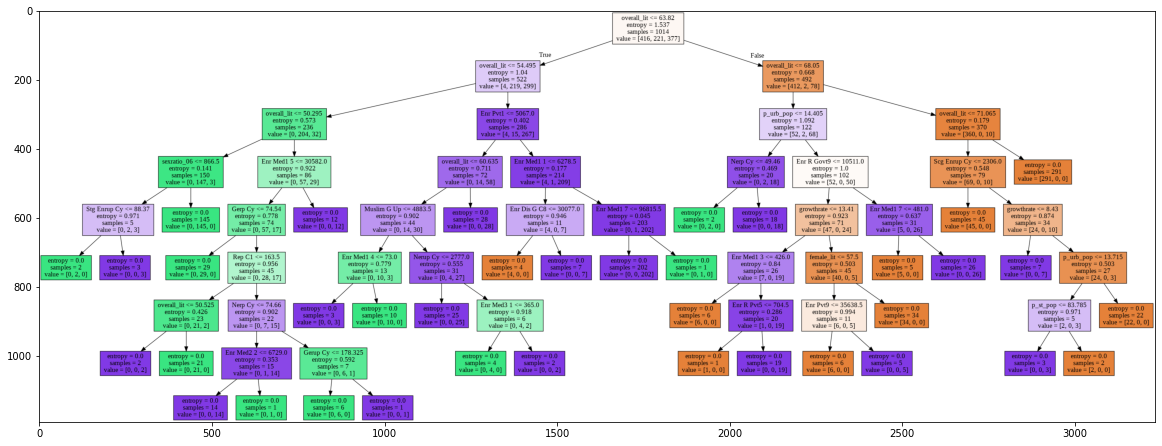

In [54]:
#plotting the tree
save_dot = "output" + ".dot"
save_png = "output"+ ".png"
graph = graphviz.Source(export_graphviz(clf1, out_file=save_dot, filled = True,feature_names=(list(red_df.columns))[:-1]))
# If there is no error in saving the image then it will written as 0
os.system("dot -T png -o " + save_png + " " + save_dot)

plt.figure(figsize=(20,20))
plt.grid(False)
plt.imshow(plt.imread(save_png))
plt.show()

In [56]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)
# Calculating accuracy
accuracy_score(y_test, y_pred)

0.7165354330708661

In [57]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   1  14]
 [  8  23  10]
 [ 16  23  52]]


In [58]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       122
           1       0.49      0.56      0.52        41
           2       0.68      0.57      0.62        91

    accuracy                           0.72       254
   macro avg       0.66      0.67      0.66       254
weighted avg       0.72      0.72      0.71       254

